In [48]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import counts_statistics as cs
import functools as ft
import numpy.linalg as lg
import scipy.linalg as sp
from tkinter import Tcl
from tqdm import tqdm
import E_Voting_func as Vote
from collections import defaultdict

In [104]:
data_dirs = r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\E_Voting'
os.chdir(data_dirs)
filenames  = ['E_voting_complete_7_no_privacy_20250522160120']

stabilizers =['xxxx',"vvvv"]   
stab_sign = [1,-1]
STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
working_dir_data =  data_dirs

In [136]:
"""
Loading the data files
Uncomment if ["n_samples", "n_samples_error", "p_pass", "p_pass_error"] txt files haven't been generated
Gets the probability list the counts in data_dirs folder

""" 

def sorting_index(filename: str):
    x, y = filename[:-len(".txt")].split("_")[2:]
    return int(y), int(x)

n_qubits = 4 
Voting = None
for index, file in enumerate(filenames):
    file_dir = f"{data_dirs}\{file}\counts"
    os.chdir(file_dir)
    files = [i for i in glob.glob("ABCD=*.txt")]
    files.sort(key = sorting_index)
    round_list = []
    ROUND_TO_FILES = defaultdict(list)
    for f in files:
        round_ = sorting_index(f)[1]
        round_list.append(round_)
        ROUND_TO_FILES[round_].append(f)
    n_rounds = np.max(round_list) + 1

    for i in tqdm(range(n_rounds)):
        writting_dir = f"{data_dirs}\{file}\Analysis_file\\v_round={i}"
        os.makedirs(f"{writting_dir}", exist_ok=True)
        stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, ROUND_TO_FILES[i], file_dir)
        samples_evolution = np.arange(1, stats.n_loops+1, 1)
        P_pass,P_pass_error,P_fail,P_fail_error,n_samples_list = stats.get_both_probability_evolution(samples_evolution, writting_dir)   

100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


In [137]:
print(len(P_fail))
print(P_fail[-1])

1232
0.025974025974025976


In [138]:
"""
Reading and analysing the stats files
"""
for index, file in enumerate(filenames):
    file_dir = f"{data_dirs}\{file}\counts"
    os.chdir(file_dir)
    files = [i for i in glob.glob("ABCD=*.txt")]
    files.sort(key = sorting_index)
    round_list = []
    ROUND_TO_FILES = defaultdict(list)
    for f in files:
        round_ = sorting_index(f)[1]
        round_list.append(round_)
        
        ROUND_TO_FILES[round_].append(f)
    n_rounds = np.max(round_list) + 1

qtys = ["p_pass","p_pass_error","p_fail","p_fail_error","n_samples"]
# samples_evolution = np.arange(1, 1e4, 1)
n_samples_evolution= []
p_fail_evolution = []
p_pass_evolution = []

for index, file in enumerate(filenames):
    n_samples_evolution.append([])
    p_fail_evolution.append([])
    p_pass_evolution.append([])

    for i in (range(n_rounds)):
        n_samples_evolution[index].append([])
        p_fail_evolution[index].append([])
        p_pass_evolution[index].append([])


for index, file in enumerate(filenames):
    for i in tqdm(range(n_rounds)):
        stats_dir = f"{data_dirs}\{file}\Analysis_file\\v_round={i}"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
                
        n_samples_evolution[index][i].append(np.array(n_samples_list))
        p_fail_evolution[index][i].append(np.array(p_fail_list))
        p_pass_evolution[index][i].append(np.array(p_pass_list))



100%|██████████| 1/1 [00:00<00:00, 19.34it/s]


C:\Users\QILIP6\AppData\Local\Temp\ipykernel_37428\274580292.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


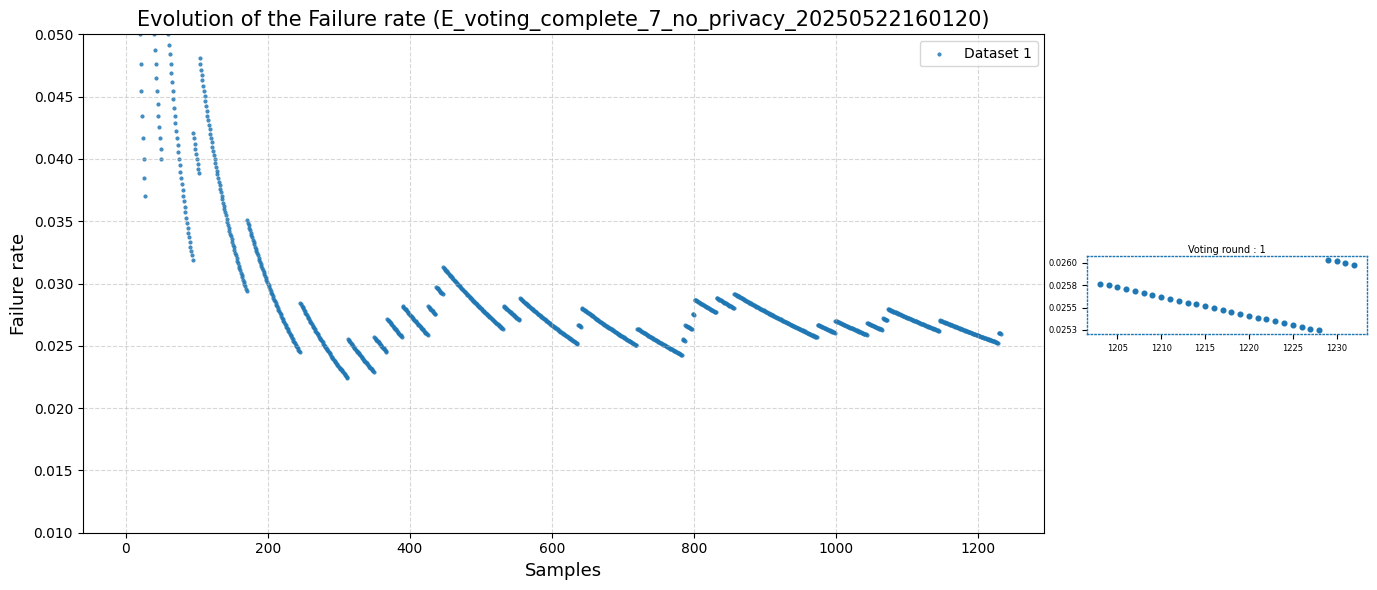

In [139]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

final_p_fail_mean = []

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', 'D', '^']

for index, file in enumerate(filenames):
    fig = plt.figure(figsize=(14, 6))
    gs = GridSpec(1, 2, width_ratios=[3, 1], figure=fig)
    ax = fig.add_subplot(gs[0])  # Graphique principal

    n_zoom = n_rounds
    zoom_height = 0.13
    zoom_spacing = 0.1
    zoom_width = 0.20
    left_offset = 0.78

    # Calcul de l'espace total occupé par les zooms
    total_zoom_height = n_zoom * zoom_height + (n_zoom - 1) * zoom_spacing
    start_top = 0.5 + total_zoom_height / 2  # Point de départ (haut) pour centrer

    for i in range(n_zoom):
        x_data = n_samples_evolution[index][i][0]
        y_data = p_fail_evolution[index][i][0]

        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]

        # Tracé principal
        ax.scatter(x_data, y_data,
                label=f"Dataset {i + 1}",
                linewidth=2,
                color=color,
                s = 1,
                alpha=0.85)
        
        # Zoom data
        x_zoom = x_data[-30:] if len(x_data) >= 10 else x_data
        y_zoom = y_data[-30:] if len(y_data) >= 10 else y_data

        # Position verticale centrée
        top_offset = start_top - i * (zoom_height + zoom_spacing)

        # Zoom subplot
        zoom_ax = fig.add_axes([left_offset, top_offset - zoom_height, zoom_width, zoom_height])
        zoom_ax.scatter(x_zoom, y_zoom, color=color, marker=marker,s = 10, linewidth=1.2)
        zoom_ax.tick_params(axis='both', labelsize=6)
        zoom_ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))    # integer
        zoom_ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))    # 4 decimals
        zoom_ax.set_title(f"Voting round : {i+1}", fontsize=7, pad=2)

        # Bordures
        for spine in zoom_ax.spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(1)
            spine.set_linestyle('dotted')

    # Graphe principal
    ax.set_ylim(0.01, 0.05)
    ax.set_xlabel("Samples", fontsize=13)
    ax.set_ylabel("Failure rate", fontsize=13)
    ax.set_title(f"Evolution of the Failure rate ({file})", fontsize=15)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend(fontsize=10, loc="best")

    plt.tight_layout()
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\E_Voting_paper\With Privacy\File_no_error\Verif_graph\Evolution_failure_{index}.pdf", bbox_inches='tight')
    plt.show()


In [688]:
############################################################### VOTING ANALYSIS LIVE  ######################################################
data_dirs = r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\E_Voting'
os.chdir(data_dirs)
filenames = ["E_voting_complete_0_20250430202258",'E_voting_complete_1_20250504155702','E_voting_complete_3_20250505055910','E_voting_complete_4_20250506075550','E_voting_complete_5_20250509235418','E_voting_complete_6_20250511200940','E_voting_complete_7_20250512170727']

P_fail_list = []
P_fail_error_list = []
n_samples_list_list = []
Measurement = []
n_files = 0

stabilizers =['xxxx',"vvvv"]   
stab_sign = [1,-1]
STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
working_dir_data =  data_dirs

for index, file in enumerate(filenames):
    file_dir = f"{data_dirs}\{file}\counts"
    os.chdir(file_dir)
    files = [i for i in glob.glob("Voting*.txt")]

for i in tqdm(range(1)):
    # # We re-calculate the statistics for the randomly selected data
    stats = cs.Operartors_Statistics(4, stabilizers, stab_sign, STABILIZER_TO_INDEX, files, data_dirs + "\\" + filenames[index] + "\counts",set_loops=1)
    writting_dir = working_dir_data + "//test"
    os.makedirs(f"{writting_dir}", exist_ok=True)
    samples_evolution = np.arange(1, stats.n_loops+1, 1)
    _,_,P_fail,P_fail_error,n_samples_list = stats.get_both_probability_evolution(samples_evolution, writting_dir)
    Measurement.append(stats.measurement)
    P_fail_list.append(P_fail)
    P_fail_error_list.append(P_fail_error)
    n_samples_list_list.append(n_samples_list)



100%|██████████| 1/1 [00:00<00:00, 163.24it/s]


In [8]:

def getting_xxxx_outcome() : 
    outcome_list = [
                    (-1.0, -1.0, -1.0, -1.0), (-1.0, -1.0, -1.0, 1.0),
                    (-1.0, -1.0, 1.0, -1.0), (-1.0, -1.0, 1.0, 1.0),
                    (-1.0, 1.0, -1.0, -1.0), (-1.0, 1.0, -1.0, 1.0),
                    (-1.0, 1.0, 1.0, -1.0), (-1.0, 1.0, 1.0, 1.0),
                    (1.0, -1.0, -1.0, -1.0), (1.0, -1.0, -1.0, 1.0),
                    (1.0, -1.0, 1.0, -1.0), (1.0, -1.0, 1.0, 1.0),
                    (1.0, 1.0, -1.0, -1.0), (1.0, 1.0, -1.0, 1.0),
                    (1.0, 1.0, 1.0, -1.0), (1.0, 1.0, 1.0, 1.0)]
        
        # Replace -1.0 with 0 in each tuple
    outcome_list = [list(0 if x == -1.0 else x for x in tpl) for tpl in outcome_list]
    
    return outcome_list

In [42]:
getting_xxxx_outcome()

[[0, 0, 0, 0],
 [0, 0, 0, 1.0],
 [0, 0, 1.0, 0],
 [0, 0, 1.0, 1.0],
 [0, 1.0, 0, 0],
 [0, 1.0, 0, 1.0],
 [0, 1.0, 1.0, 0],
 [0, 1.0, 1.0, 1.0],
 [1.0, 0, 0, 0],
 [1.0, 0, 0, 1.0],
 [1.0, 0, 1.0, 0],
 [1.0, 0, 1.0, 1.0],
 [1.0, 1.0, 0, 0],
 [1.0, 1.0, 0, 1.0],
 [1.0, 1.0, 1.0, 0],
 [1.0, 1.0, 1.0, 1.0]]

In [332]:
data_dirs = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\E_Voting_paper\With Privacy\File_no_error']
os.chdir(data_dirs[0])

filenames = [i for i in glob.glob("E_voting_*")]

Vote_wanted = [0,0,1,1]

B_old= []
Agent_index_list =[]
sigma = 200
gamma =  2
N = 4 

Amplificaion_round_vote = []

for w in range(4) :
    if len(filenames) > 1:
        Amplificaion_round = [Vote.RandomBit(w,4,10,1) for i in range(int(np.round(np.log2(len(filenames)))))]
        Amplificaion_round_vote.append(int("".join(map(str, Amplificaion_round)), 2))
    else : 
        Amplificaion_round_vote = [0]*4

print('Amplificaion_round_vote = ',Amplificaion_round_vote)

Measurement_final = []
for index,file in enumerate(filenames) :
    print(file)
    os.chdir(f"{data_dirs[0]}/{file}/counts")
    file_aux = [i for i in glob.glob("Voting*")]
    counts = []
    Measurement =[]
    Agent_index = []

    for i in file_aux :
        Agent_index.append(i.split("_")[2].split(".")[0])

    while ',' in Agent_index :
        Agent_index.remove(',')

    for i,j in enumerate(Agent_index):
        Agent_index[i] = int(j)
    print('Voting order : ',Agent_index)
    Agent_index_list.append(Agent_index)

    for file2 in file_aux : 
        with open(file2,mode = 'r') as file3 :
            for line in file3 :
                counts.append(line.split())
                
    counts = np.array(counts,dtype = int)
    result_outcome = getting_xxxx_outcome()
    for i in range(4) :
        Measurement.append([result_outcome[z] for z in range(16) if counts[i][z] == 1])
        print(f'Hadamard Measurement :', Measurement[i])
    Measurement_final.append(Measurement)
                
B = np.zeros((4,4))
B_final = np.zeros((4,4*len(filenames)))

for index in range(len(filenames)):
    for i in range(4):
        for j in range(4):
            B[i][j] = Measurement_final[index][i][0][j]
            if index == Amplificaion_round_vote[i]:
                if j == Agent_index_list[index][i] :
                    B[i][j] = (int(Vote_wanted[i]) ^ int(B[i][j]))
            B_final[i][j+(4*index)] = B[i][j]
    
E = [sum(B_final[:][i])%2 for i in range(4)]

T = [0]*2

for i in E : 
    if i == 0 :
        T[0] = T[0] + 1
    if i == 1 :
        T[1] = T[1] + 1

print('The Bulletin Board : \n', B_final )
print('The Election Vote Set :', E)
print('The Tally :', T)

B_old.append(B)

Vote_verification_vote = [0 if E[z]  == Vote_wanted[z] else 1 for z in range(len(E))]
Vote_verification = Vote.LOGICALOR(N, sigma, gamma, Vote_verification_vote, parity = False)

if Vote_verification == 1 :
    print('Error in the Tally')




Amplificaion_round_vote =  [4, 4, 3, 3]
E_voting_complete_0_20250430202258
Voting order :  [1, 3, 0, 2]
Hadamard Measurement : [[1.0, 0, 1.0, 0]]
Hadamard Measurement : [[1.0, 0, 1.0, 0]]
Hadamard Measurement : [[1.0, 0, 0, 1.0]]
Hadamard Measurement : [[0, 0, 0, 0]]
E_voting_complete_10_20250515161356
Voting order :  [1, 2, 3, 0]
Hadamard Measurement : [[1.0, 0, 1.0, 0]]
Hadamard Measurement : [[1.0, 1.0, 1.0, 1.0]]
Hadamard Measurement : [[1.0, 0, 1.0, 0]]
Hadamard Measurement : [[0, 1.0, 0, 1.0]]
E_voting_complete_11_20250516132453
Voting order :  [0, 1, 2, 3]
Hadamard Measurement : [[0, 1.0, 0, 1.0]]
Hadamard Measurement : [[1.0, 0, 0, 1.0]]
Hadamard Measurement : [[0, 1.0, 1.0, 0]]
Hadamard Measurement : [[1.0, 1.0, 0, 0]]
E_voting_complete_12_20250516214510
Voting order :  [3, 0, 2, 1]
Hadamard Measurement : [[1.0, 1.0, 1.0, 1.0]]
Hadamard Measurement : [[1.0, 1.0, 1.0, 1.0]]
Hadamard Measurement : [[0, 1.0, 0, 1.0]]
Hadamard Measurement : [[1.0, 1.0, 0, 0]]
E_voting_complete_3_2

In [714]:
data_dirs = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\E_Voting_paper\With Privacy\File_no_error']
os.chdir(data_dirs[0])

filenames = [i for i in glob.glob("E_voting_*")]

Vote_wanted = [3,2,1,1]

B_old= []
Agent_index_list =[]
sigma = 200
gamma =  2
N = 4 

def int_to_bin(n, bits):
    """Convertit un entier n en binaire signé sur 'bits' bits."""
    if n < 0:
        n = (1 << bits) + n  # Complément à deux
    if n >= (1 << bits):
        raise ValueError(f"Le nombre {n} ne peut pas être représenté sur {bits} bits.")
    return format(n, f'0{bits}b')


Measurement_final = []
for index,file in enumerate(filenames) :
    print(file)
    os.chdir(f"{data_dirs[0]}/{file}/counts")
    file_aux = [i for i in glob.glob("Voting*")]
    counts = []
    Measurement =[]
    Agent_index = []

    for i in file_aux :
        Agent_index.append(i.split("_")[2].split(".")[0])

    while ',' in Agent_index :
        Agent_index.remove(',')

    for i,j in enumerate(Agent_index):
        Agent_index[i] = int(j)
    print('Voting order : ',Agent_index)
    Agent_index_list.append(Agent_index)

    for file2 in file_aux : 
        with open(file2,mode = 'r') as file3 :
            for line in file3 :
                counts.append(line.split())
                
    counts = np.array(counts,dtype = int)
    result_outcome = getting_xxxx_outcome()
    for i in range(4) :
        Measurement.append([result_outcome[z] for z in range(16) if counts[i][z] == 1])
        print(f'Hadamard Measurement :', Measurement[i])
    Measurement_final.append(Measurement)
                
B = np.zeros((4,4))
B_final = np.zeros((4,4*len(filenames)))

for index in range(len(filenames)):
    for i in range(4):
        for j in range(4):
            B[i][j] = Measurement_final[index][i][0][j]
            if index == Amplificaion_round_vote[i]:
                if j == Agent_index_list[index][i] :
                    B[i][j] = (int(Vote_wanted[i]) ^ int(B[i][j]))
            B_final[i][j+(4*index)] = B[i][j]
    
E = [sum(B_final[:][i])%2 for i in range(4)]

T = [0]*2

for i in E : 
    if i == 0 :
        T[0] = T[0] + 1
    if i == 1 :
        T[1] = T[1] + 1

print('The Bulletin Board : \n', B_final )
print('The Election Vote Set :', E)
print('The Tally :', T)

B_old.append(B)

Vote_verification_vote = [0 if E[z]  == Vote_wanted[z] else 1 for z in range(len(E))]
Vote_verification = Vote.LOGICALOR(N, sigma, gamma, Vote_verification_vote, parity = False)

if Vote_verification == 1 :
    print('Error in the Tally')




E_voting_complete_0_20250430202258
Voting order :  [1, 3, 0, 2]
Hadamard Measurement : [[1.0, 0, 1.0, 0]]
Hadamard Measurement : [[1.0, 0, 1.0, 0]]
Hadamard Measurement : [[1.0, 0, 0, 1.0]]
Hadamard Measurement : [[0, 0, 0, 0]]
E_voting_complete_10_20250515161356
Voting order :  [1, 2, 3, 0]
Hadamard Measurement : [[1.0, 0, 1.0, 0]]
Hadamard Measurement : [[1.0, 1.0, 1.0, 1.0]]
Hadamard Measurement : [[1.0, 0, 1.0, 0]]
Hadamard Measurement : [[0, 1.0, 0, 1.0]]
E_voting_complete_11_20250516132453
Voting order :  [0, 1, 2, 3]
Hadamard Measurement : [[0, 1.0, 0, 1.0]]
Hadamard Measurement : [[1.0, 0, 0, 1.0]]
Hadamard Measurement : [[0, 1.0, 1.0, 0]]
Hadamard Measurement : [[1.0, 1.0, 0, 0]]
E_voting_complete_12_20250516214510
Voting order :  [3, 0, 2, 1]
Hadamard Measurement : [[1.0, 1.0, 1.0, 1.0]]
Hadamard Measurement : [[1.0, 1.0, 1.0, 1.0]]
Hadamard Measurement : [[0, 1.0, 0, 1.0]]
Hadamard Measurement : [[1.0, 1.0, 0, 0]]
E_voting_complete_3_20250505055910
Voting order :  [3, 2, 0, 

In [ ]:
int_to_bin()

'11'

In [746]:
data_dirs = r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\E_Voting'
os.chdir(data_dirs)
filenames  = ['E_voting_complete_4_no_privacy_20250521082633']
for file in filenames :
    print(file)
    os.chdir(f"{data_dirs}/{file}/counts")
    file_aux = [i for i in glob.glob("Voting*")]

    counts = []
    Measurement =[]

    for file2 in file_aux : 
        with open(file2,mode = 'r') as file3 :
            for line in file3 :
                counts.append(line.split())
                
    counts = np.array(counts,dtype = int)
    result_outcome = getting_xxxx_outcome()

    for i in range(len(file_aux)) :
        for z in range(len(counts[i])) :
            if counts[i][z] == 1 :
                Measurement.append(result_outcome[z])
                print(Measurement[i])
                if sum(Measurement[i]) %2 != 0:
                    print("ERROR IN THE OUTCOME")

E_voting_complete_4_no_privacy_20250521082633
[1.0, 1.0, 1.0, 1.0]
[0, 1.0, 0, 1.0]
[1.0, 1.0, 0, 0]
[1.0, 1.0, 1.0, 1.0]


In [97]:
import random
def toss_coins(gamma):
    """Toss gamma coins; return 1 if all are heads, else return 0."""
    return int(all(random.choice([0, 1]) == 1 for _ in range(gamma)))
i = 0
for z in range(9) :
    a = 0
    while a == 0 :
        a = toss_coins(13)
        i = i +1 
print(i)

90675


In [ ]:
Vote.UniqueIndex(N, sigma, gamma)

[1, 2, 0, 3]

In [50]:
egienvec, eigenval = cs.eigenvals(4,['xxxx'])